In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
img = cv2.imread('Cameraman.png', cv2.IMREAD_GRAYSCALE)

In [13]:
if img is None:
    print("Error:Unable to load the image.")
else:
    G = cv2.GaussianBlur(img ,(3,3),0)  #Apply 3x3 Guassian Blur mask for blurring the image

In [16]:
H = np.array([[0,-1,0],[-1,4,-1],[0,-1,0]],dtype=np.float32) #Define a high pass filter mask(Laplacian kernal)
HPF1 = cv2.filter2D(img, -1, H,borderType=cv2.BORDER_REPLICATE)

In [18]:
Lap_negative = np.array([[0,1,0],[1,-4,1],[0,1,0]],dtype = np.float32)  #Applying laplacian operator with a negative center value
LapF1 = cv2.filter2D(img, -1, Lap_negative, borderType=cv2.BORDER_REPLICATE)

In [19]:
#Apply Laplacian operator with a positive center value(inverted kernal)
Lap_positive = -Lap_negative #Invert the kernal for positive centered 
Lap_f2 = cv2.filter2D(img, -1, Lap_positive, borderType=cv2.BORDER_REPLICATE)

In [20]:
#HIGH BOOST FILTERING
A =2 #Amplification factor for high boost filter

#Apply averaging filter (3x3 kernel with equal weights)
c = cv2.filter2D(img , -1, np.ones((3,3),dtype = np.float32)/9, borderType = cv2.BORDER_REPLICATE)

#High Boost filtering: 
f = img -c 
g = (A - 1)* img+f

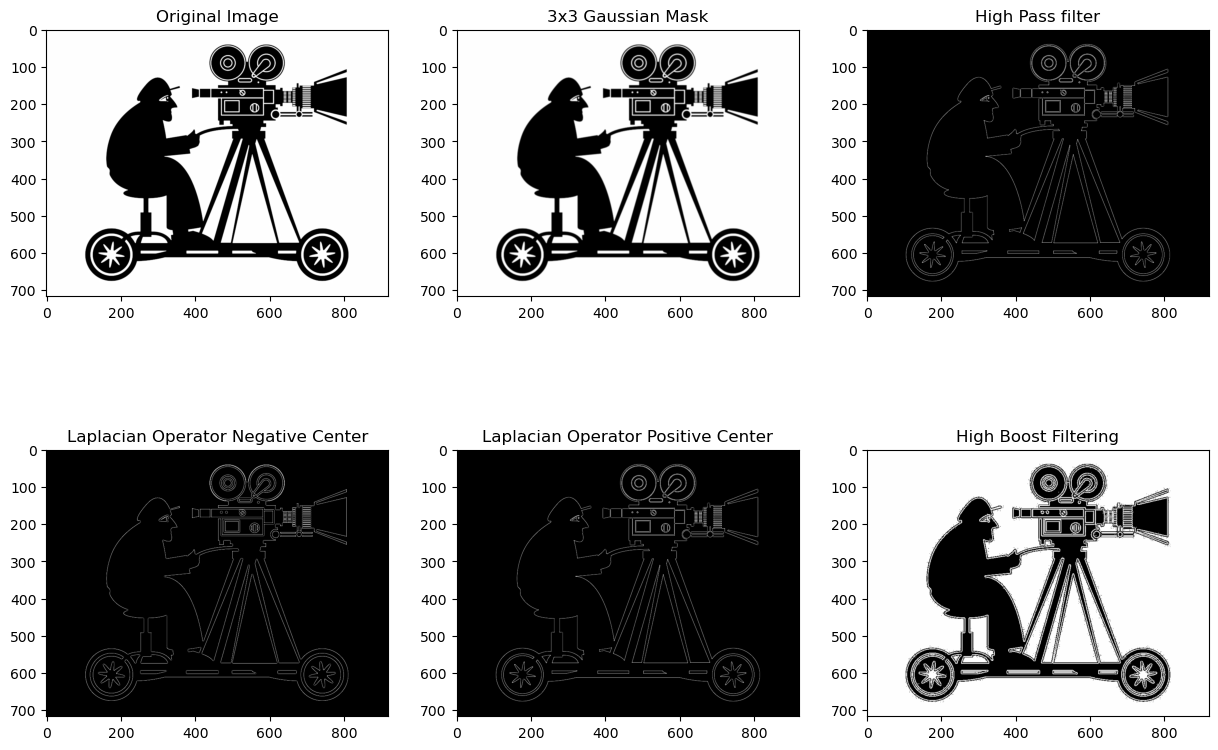

In [24]:
plt.figure(figsize = (15,10))  #Plot the results of each filter

#Display the original image
plt.subplot(2,3,1)
plt.imshow(img,cmap = 'gray')
plt.title('Original Image')


plt.subplot(2,3,2)
plt.imshow(G,cmap = 'gray')
plt.title('3x3 Gaussian Mask')

plt.subplot(2,3,3)
plt.imshow(HPF1,cmap = 'gray')
plt.title('High Pass filter')

plt.subplot(2,3,4)
plt.imshow(LapF1,cmap = 'gray')
plt.title('Laplacian Operator Negative Center')

plt.subplot(2,3,5)
plt.imshow(Lap_f2,cmap = 'gray')
plt.title('Laplacian Operator Positive Center')

plt.subplot(2,3,6)
plt.imshow(np.uint8(g),cmap = 'gray')
plt.title('High Boost Filtering')

plt.show()